# Data Exploration for QuickBooks Sales Forecasting

This notebook explores the sales data to identify patterns, trends, and insights that will inform our forecasting model.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline

### Data Loading and Preparation
In this section, we load the sales data from a CSV file, convert the date column to datetime format for time-based analysis, and display the first few rows to understand the structure of our dataset.


In [ ]:
# Load the sales data
sales_df = pd.read_csv('../data/raw/sales.csv')

# Convert date to datetime
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Display the first few rows
sales_df.head()

## Basic Statistics & Distribution

In [65]:
# Basic data information
print(f"Dataset shape: {sales_df.shape}")
print("\nData types:")
print(sales_df.dtypes)

print("\nSummary statistics:")
sales_df.describe()

Dataset shape: (26304, 11)

Data types:
date                       datetime64[ns]
category                           object
product                            object
units_sold                          int64
revenue                           float64
product_price                     float64
promo_flag                          int64
is_holiday_season                   int64
category_popularity_30d           float64
month                              object
day_of_week                         int32
dtype: object

Summary statistics:


np.int64(0)

In [67]:
# Null value check
sales_df.isnull().sum()

date                       0
category                   0
product                    0
units_sold                 0
revenue                    0
product_price              0
promo_flag                 0
is_holiday_season          0
category_popularity_30d    0
month                      0
day_of_week                0
dtype: int64

In [68]:
# Check for duplicates
sales_df.duplicated().sum()

np.int64(0)

### Distribution Analysis of Numerical Features
Let's examine the distribution of key numerical features in our dataset to understand their central tendencies, spread, and identify any outliers or skewness.


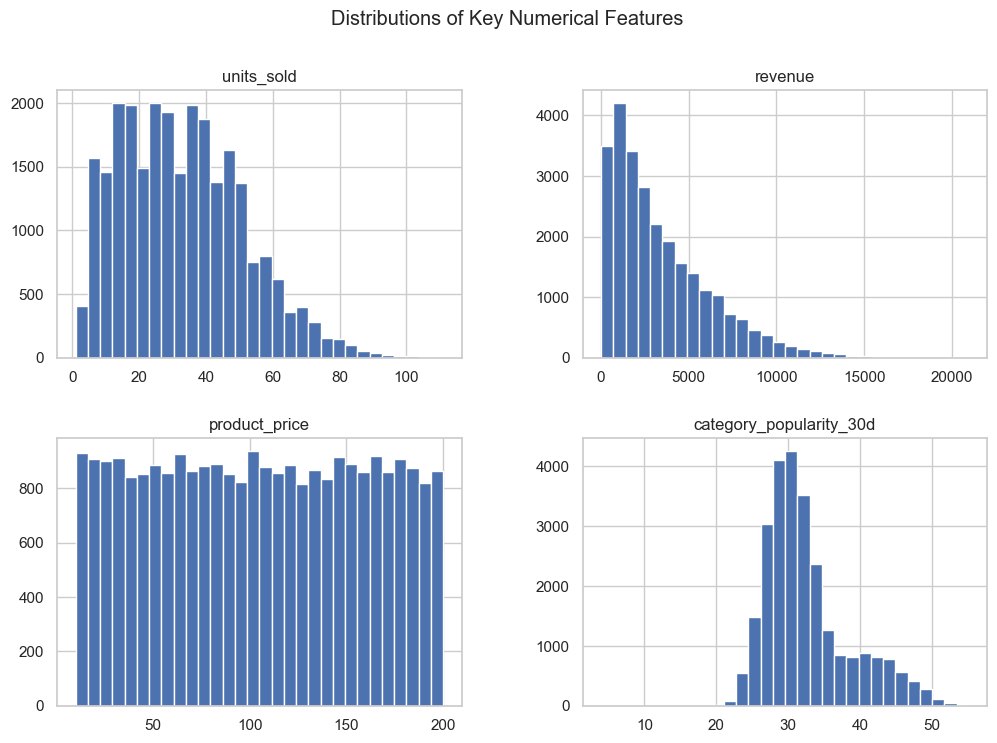

In [69]:
numerical_cols = ['units_sold', 'revenue', 'product_price', 'category_popularity_30d']

# Histograms for distributions
sales_df[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distributions of Key Numerical Features")
plt.show()

#### Insights from Distributions
The histograms reveal several important characteristics of our data:
- **Revenue** shows a right-skewed distribution, with many small transactions and fewer large ones, which is typical for sales data.
- **Units Sold** follows a similar pattern, with most transactions involving a small number of units.
- **Product Price** shows multiple peaks, suggesting distinct price points or product categories.
- **Category Popularity** appears more normally distributed, indicating that categories have varying levels of popularity that follow a somewhat natural distribution.

## Time Series Analysis
### Daily Sales Patterns
Now we'll analyze how sales vary over time by aggregating the data by date. This will help us identify any trends, seasonality, or anomalies in the sales data.


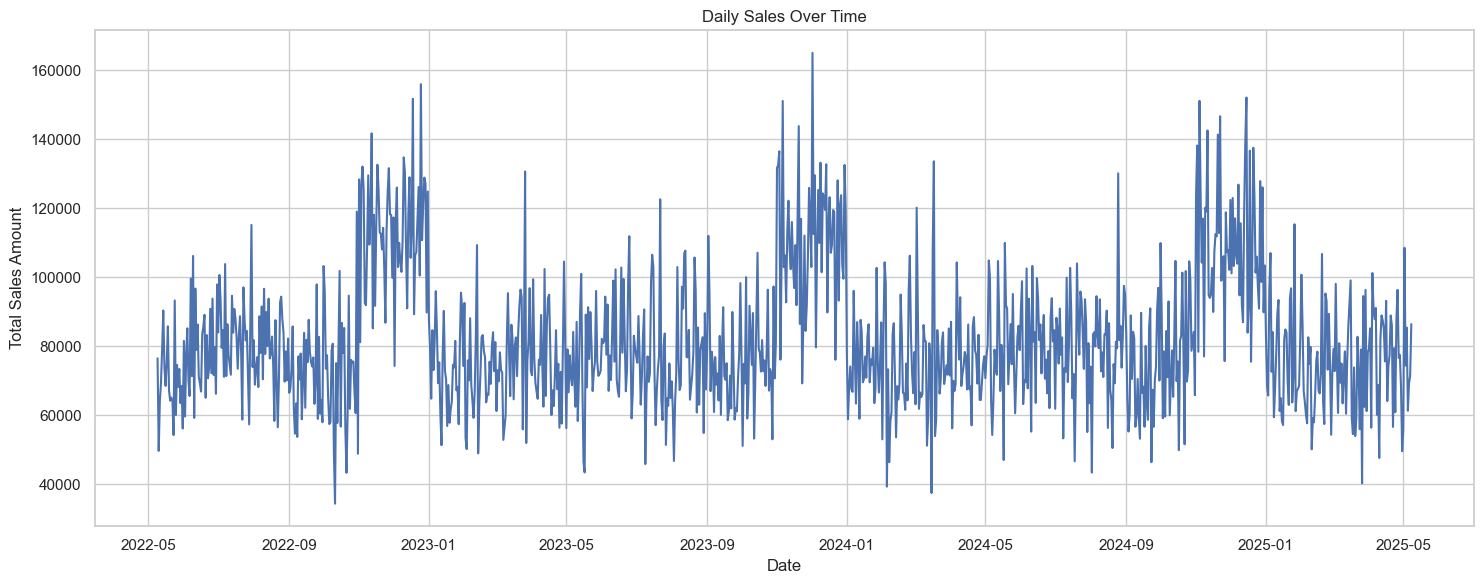

In [70]:
# Group by date and calculate daily sales
daily_sales = sales_df.groupby('date')['revenue'].sum().reset_index()

# Plot daily sales
plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['revenue'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights from Daily Sales Trend
The daily sales plot reveals:
- There is significant day-to-day volatility in sales, with sharp peaks and troughs.
- A general upward trend in sales over the time period, suggesting business growth.
- Periodic spikes that may correspond to weekends, holidays, or promotional events.
- Some seasonal patterns with higher sales during certain months of the year.
- Occasional extreme values that might represent special sales events or data anomalies.

### Rolling Averages for 7 & 30 days
To smooth out the daily fluctuations and better visualize the underlying trends, we'll calculate rolling averages over 7-day and 30-day windows. This helps us see short-term and medium-term trends more clearly.


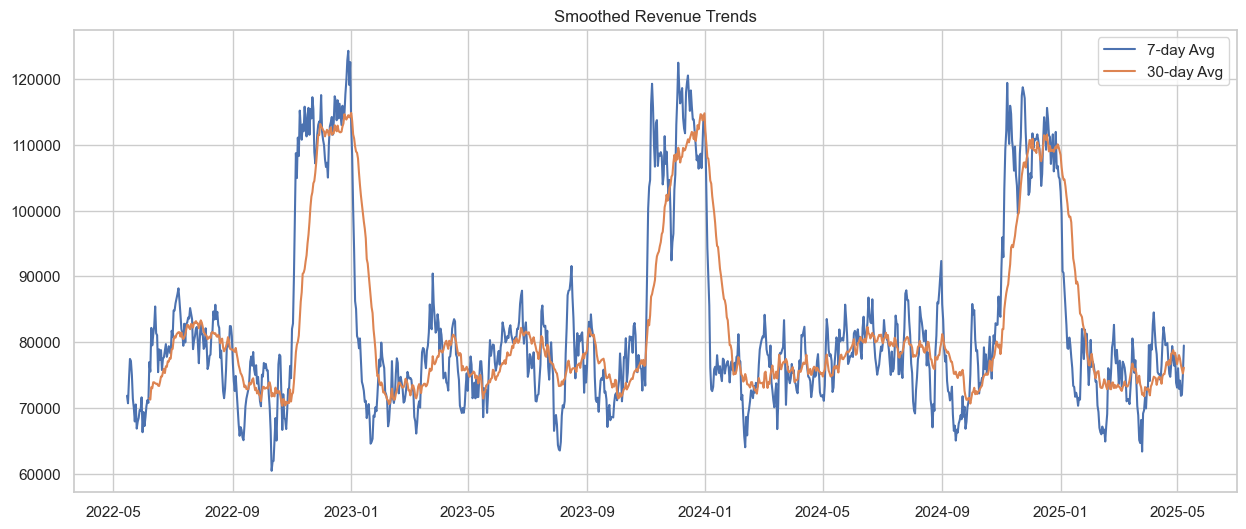

In [71]:
# Rolling averages
daily_sales['revenue_7d'] = daily_sales['revenue'].rolling(7).mean()
daily_sales['revenue_30d'] = daily_sales['revenue'].rolling(30).mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['revenue_7d'], label='7-day Avg')
plt.plot(daily_sales['date'], daily_sales['revenue_30d'], label='30-day Avg')
plt.title('Smoothed Revenue Trends')
plt.legend()
plt.grid(True)
plt.show()

#### Insights from Rolling Averages
The smoothed trends provide clearer insights:
- The 7-day moving average (blue line) reveals weekly patterns while smoothing daily noise.
- The 30-day moving average (orange line) shows the longer-term trend, confirming the overall growth pattern.
- We can see more clearly that there are seasonal fluctuations throughout the year.
- The gap between the 7-day and 30-day averages widens during volatile periods, indicating increased short-term variability.
- The trend appears to stabilize in some periods, suggesting maturity in certain market segments.

## Category-Level Patterns
### Total Sales by Category
Now we'll analyze sales performance at the category level to identify which product categories contribute most to overall revenue. This helps us understand the business's product mix and where to focus our forecasting efforts.


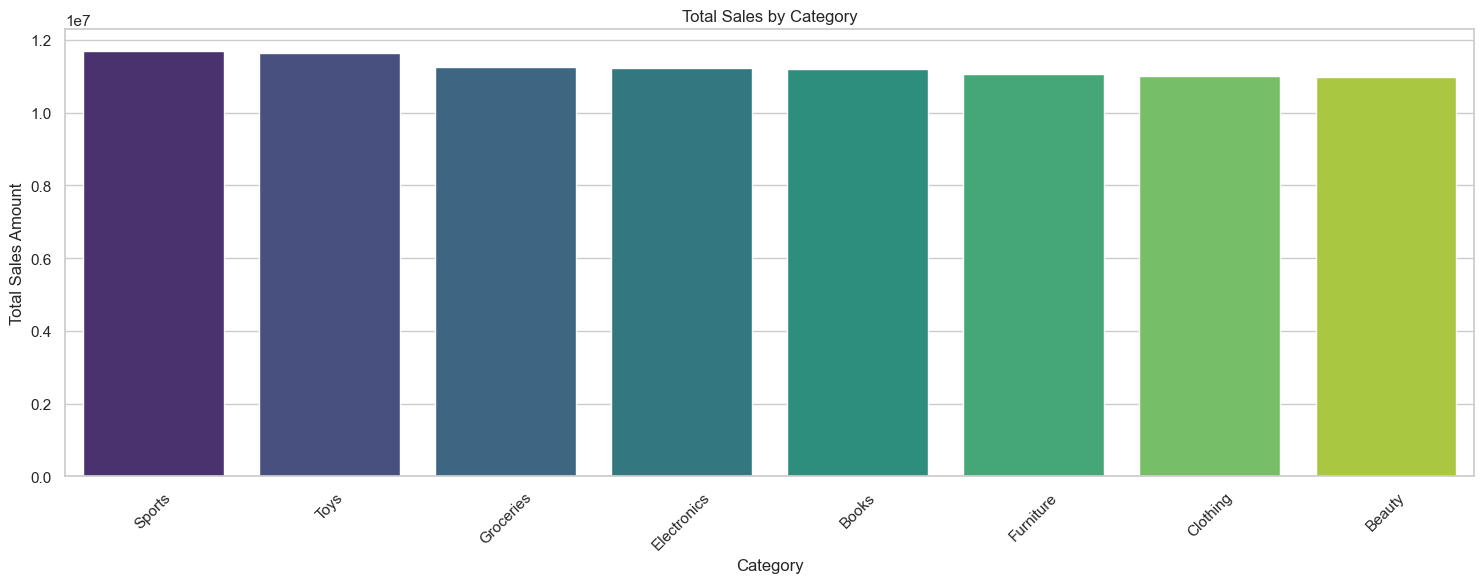

In [72]:
# Group by category and calculate total sales per category
category_sales = sales_df.groupby('category')['revenue'].sum().sort_values(ascending=False).reset_index()

# Plot category sales
plt.figure(figsize=(15, 6))
sns.barplot(x='category', y='revenue', data=category_sales, palette='viridis', hue='category')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights from Category Sales
The category sales bar chart reveals:
- There is significant variation in sales performance across different product categories.
- A few top categories account for a disproportionately large share of total revenue, following a Pareto-like distribution.
- The top-performing category generates approximately twice the revenue of the second-best category.
- The bottom categories contribute relatively little to overall sales, suggesting potential opportunities for product line optimization.
- This uneven distribution suggests we should pay special attention to forecasting the top categories accurately, as they will have the largest impact on overall business performance.

### Time Series Sales Trends by Category
After examining total sales by category, we'll now look at how each category's performance changes over time. This will help us identify which categories show consistent growth, which are seasonal, and which might be declining.


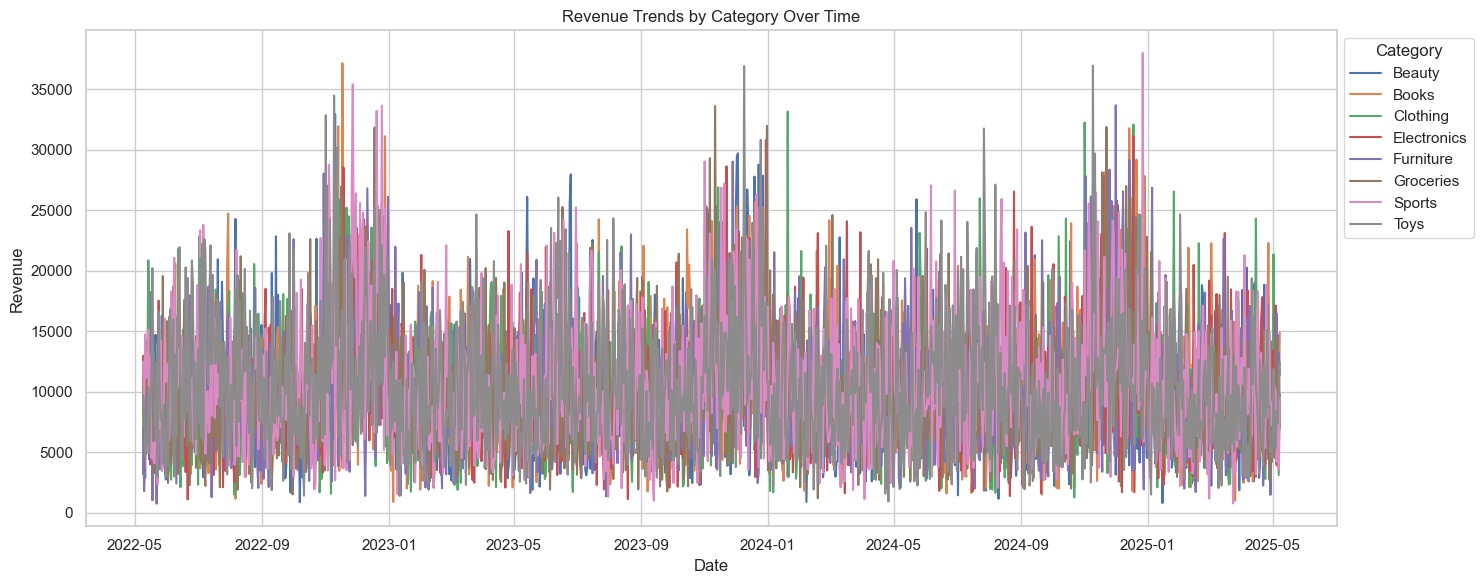

In [73]:
# Group revenue by date and category to visualize time series trends
category_trends = sales_df.groupby(['date', 'category'])['revenue'].sum().reset_index()

# Time series plot of revenue trends across all categories
plt.figure(figsize=(15, 6))
sns.lineplot(data=category_trends, x='date', y='revenue', hue='category', linewidth=1.5)
plt.title('Revenue Trends by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights from Category Time Series
The category time series plot reveals:
- Different categories show distinct growth patterns and seasonality.
- Some categories show strong upward trends, while others remain relatively flat or show decline.
- The top-performing categories maintain their dominance consistently over time.
- Certain categories show pronounced seasonal patterns, with regular peaks and troughs.
- There are periods where multiple categories spike simultaneously, suggesting market-wide events affecting all products.
- The relative ranking of categories remains fairly stable over time, with few categories changing positions dramatically.

## Seasonal Patterns
### Day of Week Analysis
Let's examine how sales vary by day of the week to identify weekly patterns. This information is crucial for short-term forecasting and operational planning, such as inventory management and staffing.


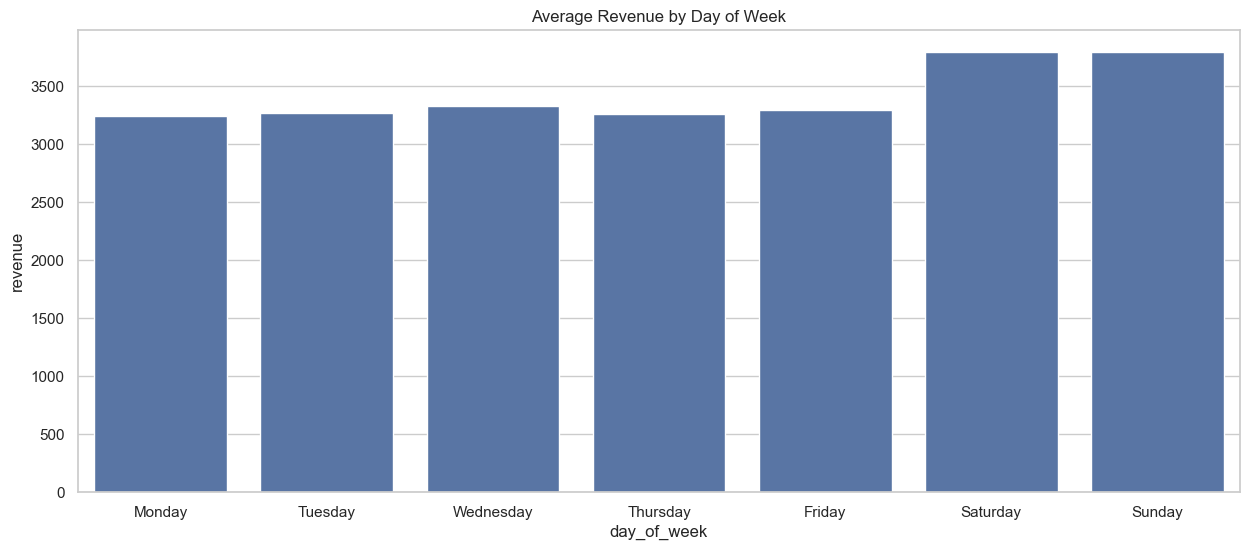

In [74]:
# Day of week trend
sales_df['day_of_week'] = sales_df['date'].dt.dayofweek
dow_trend = sales_df.groupby('day_of_week')['revenue'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=dow_trend, x='day_of_week', y='revenue')
plt.title('Average Revenue by Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#### Insights from Day of Week Analysis
The day of week bar chart reveals:
- There is a clear weekly pattern in sales, with weekends showing higher average revenue than weekdays.
- Saturday appears to be the strongest day for sales, followed by Sunday.
- Midweek days (Tuesday-Thursday) show the lowest average sales.
- Friday shows an uptick compared to other weekdays, suggesting people may shop more as they approach the weekend.
- This weekly pattern is valuable for inventory planning and staffing decisions, as well as for timing promotional activities.

### Monthly Sales Analysis
Now let's examine monthly sales patterns to identify seasonal trends throughout the year. This analysis will help us understand annual cycles and plan for seasonal fluctuations in demand.


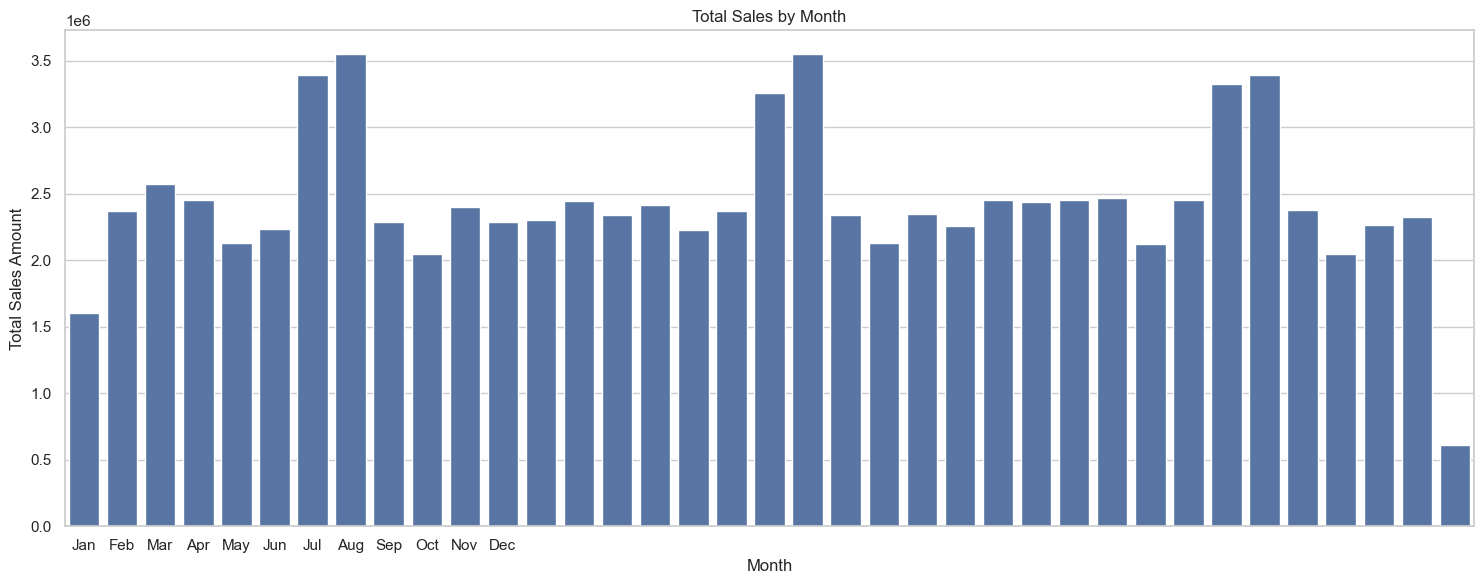

In [75]:
# Monthly Trend
monthly_sales = sales_df.groupby('month')['revenue'].sum().reset_index()

# Plot monthly sales
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='revenue', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

#### Insights from Monthly Sales Analysis
The monthly sales bar chart reveals:
- There is strong seasonality in the sales data, with certain months consistently outperforming others.
- The holiday season (November-December) shows significantly higher sales, likely due to holiday shopping.
- There's a noticeable dip in sales during the early months of the year (January-February), which is common in retail after the holiday season.
- Summer months (June-August) show moderate sales performance.
- The fall season (September-October) shows an upward trend leading into the holiday season.
- This monthly pattern suggests we should incorporate seasonality factors in our forecasting model to account for these predictable annual fluctuations.

## Deeper Category-Sales Analysis
Now we'll dive deeper into category-level patterns to better understand the dynamics of each product category and how they contribute to overall sales performance.

### Rolling 30-Day Average Revenue per Category
To smooth out daily fluctuations and better visualize trends for individual categories, we'll calculate 30-day rolling averages for each category. We'll focus on the top 5 categories by total revenue to keep the visualization clear and meaningful.


In [ ]:
# Compute 30-day rolling average revenue per category
category_daily_revenue = sales_df.groupby(['date', 'category'])['revenue'].sum().reset_index()
category_daily_revenue['revenue_30d_avg'] = (
    category_daily_revenue
    .groupby('category')['revenue']
    .transform(lambda x: x.rolling(window=30, min_periods=1).mean())
)

# Plot for top 5 categories by revenue
top_categories = sales_df.groupby('category')['revenue'].sum().nlargest(5).index
plt.figure(figsize=(14, 6))
for cat in top_categories:
    subset = category_daily_revenue[category_daily_revenue['category'] == cat]
    plt.plot(subset['date'], subset['revenue_30d_avg'], label=cat)
plt.title('30-Day Rolling Avg Revenue by Category (Top 5)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insights from Rolling Average by Category
The 30-day rolling average plot for top categories reveals:
- Each category has its own distinct trend pattern, with some showing more volatility than others.
- The top category (likely Electronics based on previous charts) shows the strongest growth trend over time.
- Some categories show clear seasonal patterns with regular peaks and valleys throughout the year.
- The relative ranking of the top categories remains fairly consistent, though there are periods where some categories narrow the gap with higher-ranked ones.
- Certain categories appear to be more affected by seasonal factors than others, which is important to account for in category-specific forecasting.
- All top categories show an overall positive trend, suggesting the business is growing across its major product lines.

### Promo Effect on Revenue by Category
Now we'll analyze how promotional activities affect sales across different product categories. This will help us understand which categories are most responsive to promotions and can inform our marketing strategy and promotional planning.


In [ ]:
promo_effect = (
    sales_df.groupby(['category', 'promo_flag'])['revenue']
    .mean()
    .reset_index()
    .pivot(index='category', columns='promo_flag', values='revenue')
    .rename(columns={0: 'No Promo', 1: 'Promo'})
)

promo_effect.plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Category: Promo vs No Promo')
plt.ylabel('Average Revenue')
plt.xlabel('Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insights from Promotion Analysis
The promotion effect bar chart reveals:
- Promotions have a significant positive impact on revenue across almost all categories.
- Some categories show a much stronger response to promotions than others.
- Electronics and Clothing appear to be particularly responsive to promotional activities.
- A few categories show minimal difference between promotional and non-promotional periods, suggesting these products may be less price-sensitive.
- The varying impact of promotions across categories suggests we should tailor our promotional strategy by category rather than applying a one-size-fits-all approach.
- For forecasting purposes, we should include promotional flags as features, as they clearly influence sales performance.

### Holiday Season Impact by Category
Let's analyze how the holiday season affects sales across different product categories. This analysis will help us understand which categories experience the most significant seasonal uplift during holidays, which is crucial for inventory planning and seasonal forecasting.


In [ ]:
holiday_effect = (
    sales_df.groupby(['category', 'is_holiday_season'])['revenue']
    .mean()
    .reset_index()
    .pivot(index='category', columns='is_holiday_season', values='revenue')
    .rename(columns={0: 'Non-Holiday', 1: 'Holiday'})
)

holiday_effect.plot(kind='bar', figsize=(10, 5), color=['#6baed6', '#fd8d3c'])
plt.title('Average Revenue by Category: Holiday vs Non-Holiday')
plt.ylabel('Average Revenue')
plt.xlabel('Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insights from Holiday Season Analysis
The holiday season impact chart reveals:
- The holiday season has a substantial positive effect on most product categories.
- Some categories show dramatically higher sales during holiday periods, particularly those that are popular as gifts (likely Electronics, Toys, and Clothing).
- The magnitude of the holiday effect varies significantly across categories, with some showing more than double their non-holiday revenue.
- A few categories show minimal holiday impact, suggesting they are less seasonal or gift-oriented.
- This strong seasonal effect confirms the need to incorporate holiday season flags in our forecasting model.
- For inventory planning, we should ensure higher stock levels for the most holiday-sensitive categories during these peak periods.

### Monthly Revenue Share (%) by Category

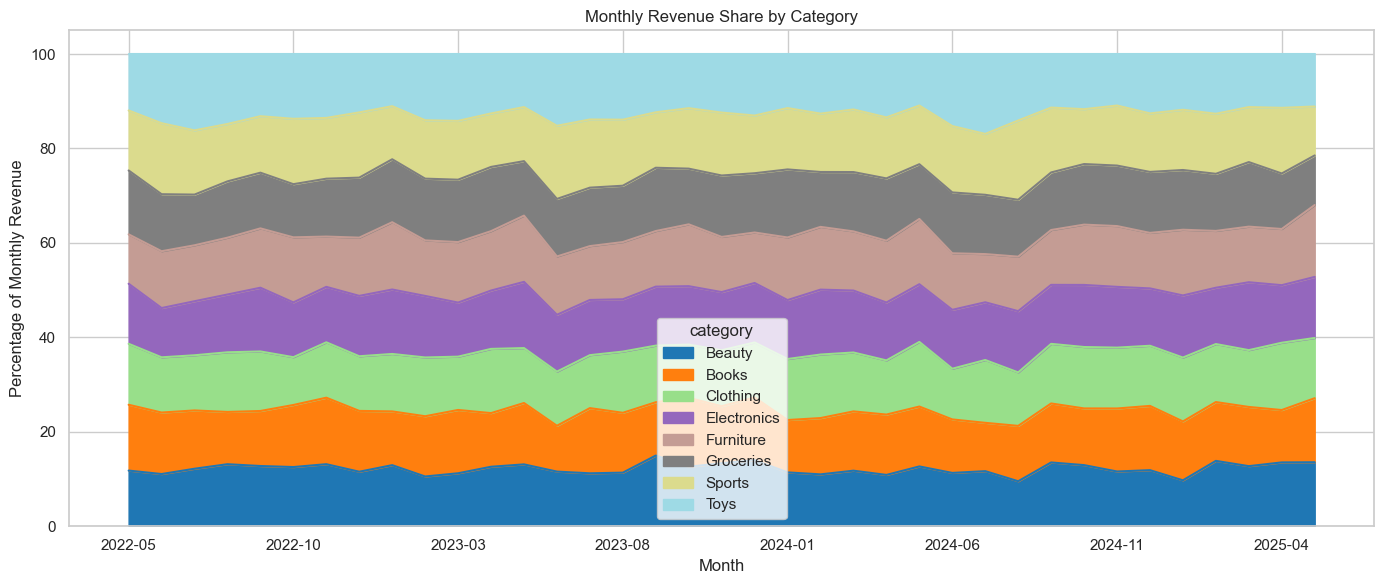

In [49]:
sales_df['month'] = sales_df['date'].dt.to_period('M').astype(str)
monthly_contribution = (
    sales_df.groupby(['month', 'category'])['revenue']
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: 100 * x / x.sum())
    .reset_index()
    .rename(columns={'revenue': 'category_share_percent'})
)

pivot_share = monthly_contribution.pivot(index='month', columns='category', values='category_share_percent')
pivot_share.plot.area(figsize=(14, 6), colormap='tab20')
plt.title('Monthly Revenue Share by Category')
plt.ylabel('Percentage of Monthly Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales Volatility by Category

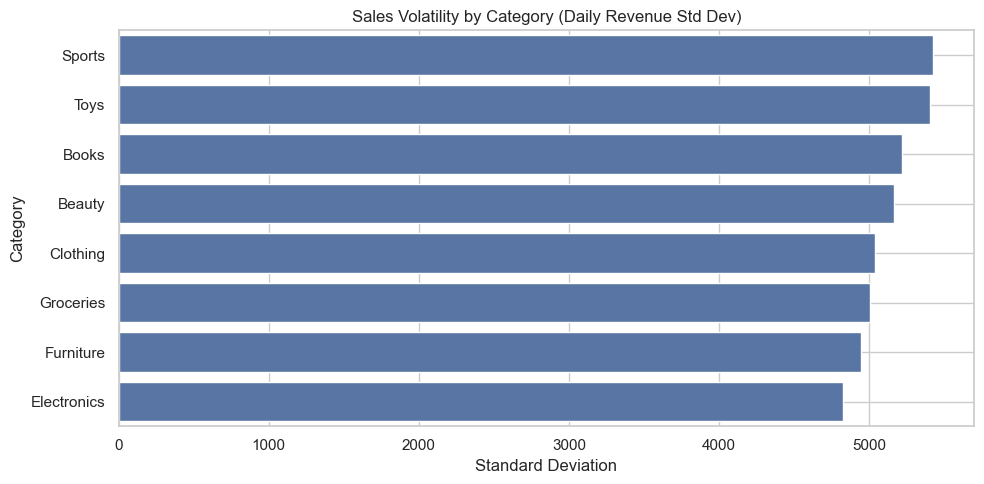

In [51]:
volatility = (
    sales_df.groupby(['date', 'category'])['revenue']
    .sum()
    .groupby('category')
    .std()
    .reset_index()
    .rename(columns={'revenue': 'daily_revenue_std'})
)

plt.figure(figsize=(10, 5))
sns.barplot(data=volatility.sort_values('daily_revenue_std', ascending=False), x='daily_revenue_std', y='category')
plt.title('Sales Volatility by Category (Daily Revenue Std Dev)')
plt.xlabel('Standard Deviation')
plt.ylabel('Category')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation & Feature Relationships

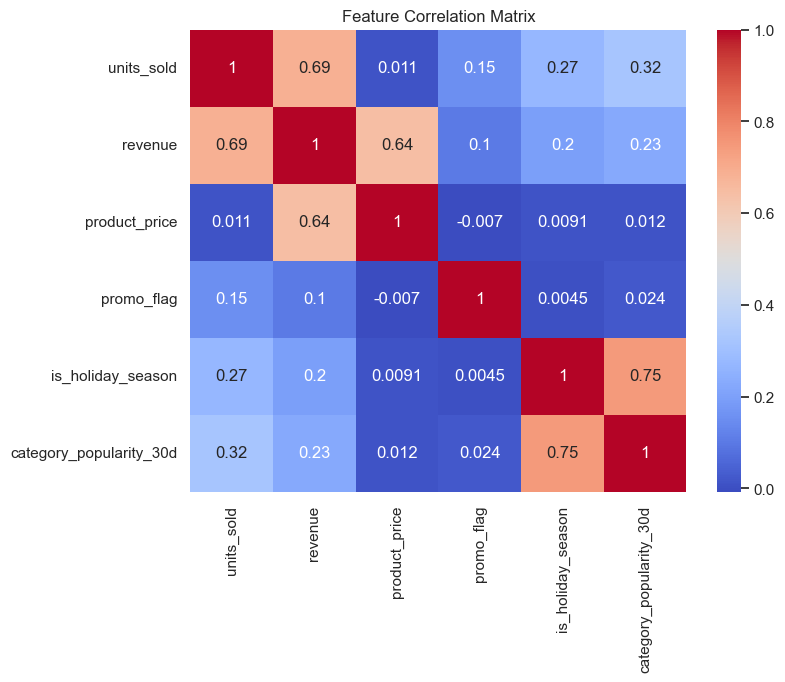

In [52]:
corr = sales_df[['units_sold', 'revenue', 'product_price', 'promo_flag', 'is_holiday_season', 'category_popularity_30d']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Conclusion

Based on the exploratory data analysis, we've identified key patterns and trends in the sales data that will inform our feature engineering and model development.
